In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.utils import parse_whole_directory_old

In [2]:
def plot3d_loss(dataframe, zlim=None, rotation=225):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe.get((x[0], x[1]), default=0.45),
                              np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(5, 5))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=rotation)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    #ax.set_zlabel("Loss", rotation=90)

In [3]:
experiment1 = parse_whole_directory_old("models/experiment01/")
experiment2 = parse_whole_directory_old("models/experiment02/")
experiment3 = parse_whole_directory_old("models/experiment03/")
experiment4 = parse_whole_directory_old("models/experiment04/")

# Experiment 1

Basic estimation of width and depth.

In [4]:
argmin_epchs_basic = np.array([v[3] for v in experiment1["val_loss"].loc[:,:,False].groupby(("depth", "width", "datetime")).idxmin()])
argmin_epchs_normal = np.array([v[3] for v in experiment1["val_loss"].loc[:,:,True].groupby(("depth", "width", "datetime")).idxmin()])
print(argmin_epchs_basic.mean(), argmin_epchs_basic.std(), np.median(argmin_epchs_basic))
print(argmin_epchs_normal.mean(), argmin_epchs_normal.std(), np.median(argmin_epchs_normal))

700.556666667 255.444775745 750.5
407.913043478 307.661150851 293.0


In [5]:
ex1_min = experiment1.groupby(("depth", "width", "normalized", "datetime")).min()
ex1_min_basic = ex1_min.loc(axis=0)[:,:,False]
ex1_min_normal = ex1_min.loc(axis=0)[:,:,True]

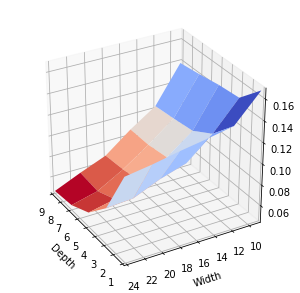

In [6]:
plot3d_loss(ex1_min_basic["loss"].groupby(("depth", "width")).mean(), rotation=150)
plt.savefig("approach1-ex1-loss-basic.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

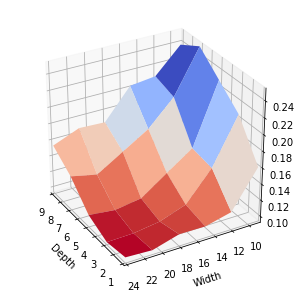

In [7]:
plot3d_loss(ex1_min_basic["val_loss"].groupby(("depth", "width")).mean(), rotation=150)
plt.savefig("approach1-ex1-val-basic.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

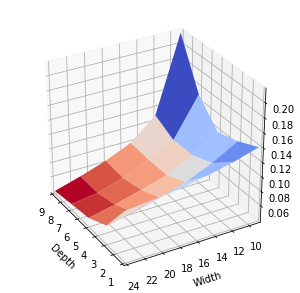

In [8]:
plot3d_loss(ex1_min_normal["loss"].groupby(("depth", "width")).mean(), rotation=150)
plt.savefig("approach1-ex1-loss-normal.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

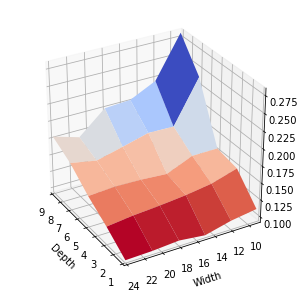

In [9]:
plot3d_loss(ex1_min_normal["val_loss"].groupby(("depth", "width")).mean(), rotation=150)
plt.savefig("approach1-ex1-val-normal.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

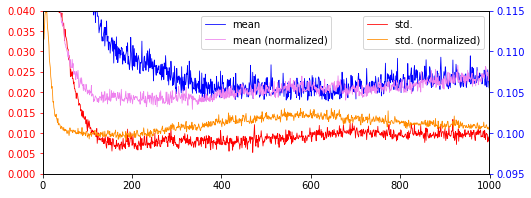

In [166]:
d1w21_basic = experiment1["val_loss"].loc[1, 24, False]
d1w21_normal = experiment1["val_loss"].loc[1, 24, True]
plt.figure(figsize=(8,3))
ax2 = d1w21_basic.groupby("epoch").std().plot(color="red", linewidth=0.8)
d1w21_normal.groupby("epoch").std().plot(color="darkorange", linewidth=0.8)
ax2.tick_params(axis="y", colors="red")
plt.legend(("std.", "std. (normalized)"), title="")
plt.ylim(0, 0.04)
ax1 = d1w21_basic.groupby("epoch").mean().plot(secondary_y=True, color="blue", linewidth=0.8)
d1w21_normal.groupby("epoch").mean().plot(secondary_y=True, color="violet", linewidth=0.8)
ax1.tick_params(axis="y", colors="blue")
ax1.set_xlabel("")
ax2.set_xlabel("")
plt.legend(("mean", "mean (normalized)"), loc="upper center", title="")
plt.ylim(0.095,0.115)
plt.savefig("approach1-ex1-progression.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

In [11]:
print(experiment1.min(), experiment1.idxmin(), sep="\n")

loss        0.034753
val_loss    0.074803
dtype: float32
loss         (9, 24, True, 2017-07-03 15:29:55, 957)
val_loss    (3, 21, False, 2017-07-03 15:13:45, 700)
dtype: object


# Experiment 2

Using days to expiration as an explicit prior.

In [12]:
ex2_min = experiment2["val_loss"][1,:,False].groupby(("width", "datetime")).min()

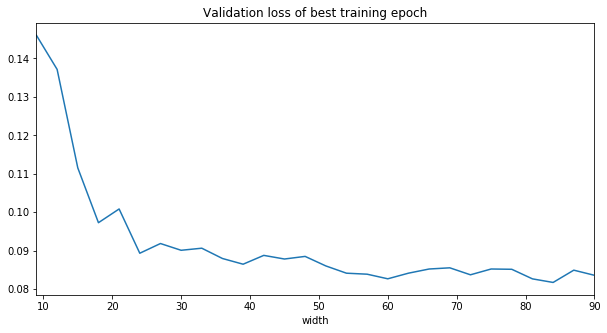

In [13]:
ex2_min.groupby("width").mean().plot(figsize=(10,5))
plt.title("Validation loss of best training epoch")
plt.show()

# Experiment 3

Trying out regularization with SeLU activation function.

In [14]:
ex3_min = experiment3["val_loss"][:,:,False].groupby(("depth", "width", "datetime")).min()
experiment3.groupby(("depth", "width", "normalized", "datetime")).min()

loss  val_loss
depth width normalized datetime                               
1     3     False      2017-07-07 15:09:58  0.227226  0.303259
      6     False      2017-07-07 15:10:03  0.157348  0.127234
      9     False      2017-07-07 15:09:58  0.136526  0.101006
      12    False      2017-07-07 15:09:58  0.114042  0.093892
      15    False      2017-07-07 15:09:58  0.120282  0.101878
      18    False      2017-07-07 15:09:57  0.112638  0.093489
      21    False      2017-07-07 15:09:55  0.110029  0.092254
      24    False      2017-07-07 15:09:57  0.102090  0.090895
      27    False      2017-07-07 15:09:57  0.094301  0.086356
      30    False      2017-07-07 15:09:56  0.101178  0.088923
      33    False      2017-07-07 15:09:57  0.098583  0.079747
4     3     False      2017-07-07 15:10:03  0.226650  0.298832
      6     False      2017-07-07 15:09:58  0.131592  0.176661
      9     False      2017-07-07 15:10:03  0.109431  0.135244
      12    False      2017-07-07 15:10:04  0.090935  0.104784
      15    False      2017-07-07 15:09:58  0.075992  0.117263
      18    False      2017-07-07 15:09:56  0.073638  0.101192
      21    False      2017-07-07 15:09:57  0.062421  0.090045
      24    False      2017-07-07 15:09:58  0.058803  0.093860
      27    False      2017-07-07 15:09:59  0.053730  0.093130
      30    False      2017-07-07 15:09:56  0.043519  0.103321
      33    False      2017-07-07 15:09:57  0.040668  0.089313
7     3     False      2017-07-07 15:10:03  0.238643  0.305181
      6     False      2017-07-07 15:09:58  0.147180  0.250486
      9     False      2017-07-07 15:09:58  0.100005  0.131707
      12    False      2017-07-07 15:09:55  0.070405  0.113367
      15    False      2017-07-07 15:09:58  0.061198  0.124002
      18    False      2017-07-07 15:09:56  0.049842  0.118765
      21    False      2017-07-07 15:10:03  0.042158  0.100945
      24    False      2017-07-07 15:09:56  0.040189  0.100826
...                                              ...       ...
94    12    False      2017-07-07 16:02:10  0.488258  0.445389
      15    False      2017-07-07 16:02:11  0.488218  0.446972
      18    False      2017-07-07 16:02:11  0.488274  0.445137
      21    False      2017-07-07 16:01:40  0.488278  0.436021
      24    False      2017-07-07 16:02:09  0.488013  0.438534
      27    False      2017-07-07 16:01:41  0.488128  0.434794
      30    False      2017-07-07 16:01:39  0.488263  0.440611
      33    False      2017-07-07 16:02:12  0.488056  0.435085
97    3     False      2017-07-07 16:01:42  0.488267  0.443431
      6     False      2017-07-07 16:01:41  0.488102  0.446900
      9     False      2017-07-07 16:02:10  0.462172  0.423553
      12    False      2017-07-07 16:02:03  0.488051  0.449025
      15    False      2017-07-07 16:02:15  0.488262  0.439621
      18    False      2017-07-07 16:01:41  0.488250  0.439389
      21    False      2017-07-07 16:02:09  0.487842  0.432468
      24    False      2017-07-07 16:02:11  0.488205  0.439876
      27    False      2017-07-07 16:02:08  0.488338  0.435534
      30    False      2017-07-07 16:02:15  0.488284  0.438601
      33    False      2017-07-07 16:02:10  0.488982  0.436250
100   3     False      2017-07-07 16:02:10  0.462695  0.448113
      6     False      2017-07-07 16:02:11  0.479789  0.445911
      9     False      2017-07-07 16:07:11  0.488120  0.443657
      12    False      2017-07-07 16:07:28  0.488290  0.443446
      15    False      2017-07-07 16:07:46  0.488627  0.442167
      18    False      2017-07-07 16:07:46  0.450130  0.442123
      21    False      2017-07-07 16:08:00  0.488876  0.433511
      24    False      2017-07-07 16:08:02  0.478684  0.437903
      27    False      2017-07-07 16:08:13  0.489205  0.436655
      30    False      2017-07-07 16:08:32  0.489233  0.434586
      33    False      2017-07-07 16:08:32  0.488441  0.430754

[374 rows x 2 columns]

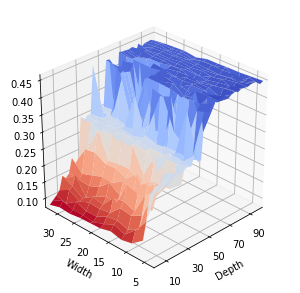

In [15]:
plot3d_loss(ex3_min.groupby(("depth", "width")).mean())
plt.xticks(np.arange(10, 100, 20))
plt.savefig("approach1-ex3-val-selu.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

In [16]:
experiment35 = parse_whole_directory_old("models/experiment03.5/")

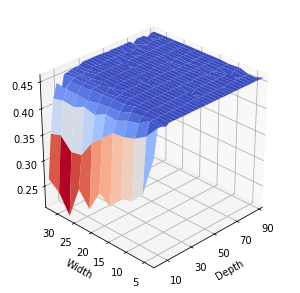

In [17]:
ex35_min = experiment35["val_loss"][:,:,False].groupby(("depth", "width", "datetime")).min()
experiment35.groupby(("depth", "width", "normalized", "datetime")).min()
plot3d_loss(ex35_min.groupby(("depth", "width")).mean())
plt.xticks(np.arange(10, 100, 20))
plt.savefig("approach1-ex3-val-dropout.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

# Experiment 4

Using more input in hope of better performance.

In [25]:
ex4_min

width  normalized  datetime           
20     False       2017-07-09 16:33:58    0.101104
                   2017-07-09 16:34:40    0.106660
                   2017-07-09 16:35:32    0.094466
                   2017-07-09 16:36:21    0.103165
                   2017-07-09 16:37:14    0.099687
                   2017-07-09 16:38:05    0.099324
                   2017-07-09 16:39:07    0.090590
                   2017-07-09 16:40:15    0.094009
                   2017-07-09 16:41:05    0.094758
                   2017-07-09 16:42:09    0.107977
       True        2017-07-09 16:45:52    0.169438
                   2017-07-09 16:46:32    0.168818
                   2017-07-09 16:47:27    0.176180
                   2017-07-09 16:48:16    0.161543
                   2017-07-09 16:49:13    0.175029
                   2017-07-09 16:50:12    0.173219
                   2017-07-09 16:51:17    0.158389
                   2017-07-09 16:52:12    0.162988
                   2017-07-09 16:53:19    0

In [18]:
ex4_min = experiment4["val_loss"][1].groupby(("width", "normalized", "datetime")).min()
ex4_min_basic = ex4_min[:,False]
ex4_min_normal = ex4_min[:,True]

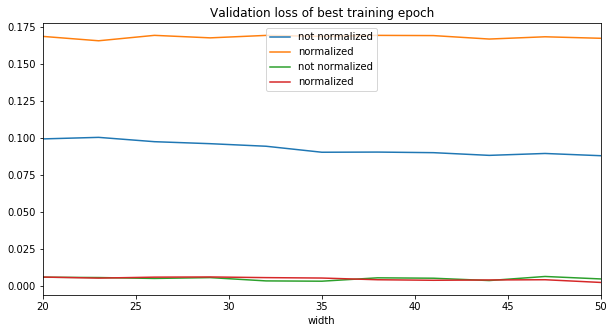

In [26]:
ex4_min_basic.groupby("width").mean().plot(figsize=(10,5), label="not normalized")
ex4_min_normal.groupby("width").mean().plot(label="normalized")
plt.legend()
plt.title("Validation loss of best training epoch")
plt.show()

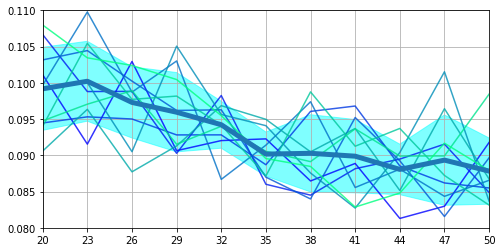

In [159]:
ex4_per_width = pd.DataFrame(ex4_min_basic.values.reshape((11, 10)), index=ex4_min_basic.index.levels[0])
width = ex4_per_width.T.mean()
std = ex4_per_width.T.std()
ax = ex4_per_width.plot(colormap=cm.winter, legend=False, figsize=(8,4), alpha=0.8)
width.plot(linewidth=5)
plt.xticks(np.arange(20, 51, 3))
plt.grid()
plt.ylim(0.080, 0.110)
plt.xlabel("")
x = np.arange(20, 51, 3)
xx = np.concatenate((x, x[::-1]))
yy = np.concatenate((width.values + std.values, (width.values - std.values)[::-1]))
plt.fill(xx, yy, color="cyan", alpha=0.5)
#ax.xaxis.set_ticklabels(())
plt.savefig("approach1-ex4-val-basic.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

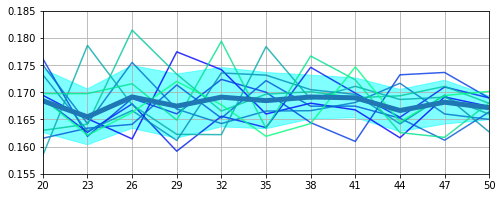

In [157]:
ex4_per_width = pd.DataFrame(ex4_min_normal.values.reshape((11, 10)), index=ex4_min_basic.index.levels[0])
width = ex4_per_width.T.mean()
std = ex4_per_width.T.std()
ex4_per_width.plot(colormap=cm.winter, legend=False, figsize=(8,3), alpha=0.8)
width.plot(linewidth=5)
plt.xticks(np.arange(20, 51, 3))
plt.ylim(0.155, 0.185)
plt.grid()
plt.xlabel("")
x = np.arange(20, 51, 3)
xx = np.concatenate((x, x[::-1]))
yy = np.concatenate((width.values + std.values, (width.values - std.values)[::-1]))
plt.fill(xx, yy, color="cyan", alpha=0.5)
plt.savefig("approach1-ex4-val-normal.pdf", format="pdf", bbox_inches="tight", dpi=300)
plt.show()

In [168]:
ex4_min_basic

width  datetime           
20     2017-07-09 16:33:58    0.101104
       2017-07-09 16:34:40    0.106660
       2017-07-09 16:35:32    0.094466
       2017-07-09 16:36:21    0.103165
       2017-07-09 16:37:14    0.099687
       2017-07-09 16:38:05    0.099324
       2017-07-09 16:39:07    0.090590
       2017-07-09 16:40:15    0.094009
       2017-07-09 16:41:05    0.094758
       2017-07-09 16:42:09    0.107977
23     2017-07-09 16:33:58    0.091542
       2017-07-09 16:34:40    0.098798
       2017-07-09 16:35:31    0.095309
       2017-07-09 16:36:24    0.104449
       2017-07-09 16:37:13    0.109778
       2017-07-09 16:38:10    0.100013
       2017-07-09 16:39:26    0.096345
       2017-07-09 16:40:17    0.105453
       2017-07-09 16:41:11    0.097055
       2017-07-09 16:42:09    0.103452
26     2017-07-09 16:33:59    0.102946
       2017-07-09 16:34:41    0.098822
       2017-07-09 16:35:33    0.095011
       2017-07-09 16:36:24    0.100243
       2017-07-09 16:37:17    0.09871

# General comparison

Looking at the validation loss of the best epoch.